In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
USE_MTE = False
USE_BINARIZED_VALUES = True

Задача состоит в предсказании уровня урона, нанесенному дому, в следтвие землетрясения.

Labels:
* 1 represents low damage
* 2 represents a medium amount of damage
* 3 represents almost complete destruction

Description
* `geo_level_1_id', geo_level_2_id, geo_level_3_id` (type: **int**): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
* `count_floors_pre_eq` (type: **int**): number of floors in the building before the earthquake.
* `age` (type: **int**): age of the building in years.
* `area_percentage` (type: **int**): normalized area of the building footprint.
* `height_percentage` (type: **int**): normalized height of the building footprint.
* `land_surface_condition` (type: **categorical**): surface condition of the land where the building was built. Possible values: n, o, t.
* `foundation_type` (type: **categorical**): type of foundation used while building. Possible values: h, i, r, u, w.
* `roof_type` (type: **categorical**): type of roof used while building. Possible values: n, q, x.
* `ground_floor_type` (type: **categorical**): type of the ground floor. Possible values: f, m, v, x, z.
* `other_floor_type` (type: **categorical**): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
* `position` (type: **categorical**): position of the building. Possible values: j, o, s, t.
* `plan_configuration` (type: **categorical**): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
* `has_superstructure_adobe_mud` (type: **binary**): flag variable that indicates if the superstructure was made of Adobe/Mud.
* `has_superstructure_mud_mortar_stone` (type: **binary**): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
* `has_superstructure_stone_flag` (type: **binary**): flag variable that indicates if the superstructure was made of Stone.
* `has_superstructure_cement_mortar_stone` (type: **binary**): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
* `has_superstructure_mud_mortar_brick` (type: **binary**): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
* `has_superstructure_cement_mortar_brick` (type: **binary**): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
* `has_superstructure_timber` (type: **binary**): flag variable that indicates if the superstructure was made of Timber.
* `has_superstructure_bamboo` (type: **binary**): flag variable that indicates if the superstructure was made of Bamboo.
* `has_superstructure_rc_non_engineered` (type: **binary**): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
* `has_superstructure_rc_engineered` (type: **binary**): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
* `has_superstructure_other` (type: **binary**): flag variable that indicates if the superstructure was made of any other material.
* `legal_ownership_status` (type: **categorical**): legal ownership status of the land where building was built. Possible values: a, r, v, w.
* `count_families` (type: **int**): number of families that live in the building.
* `has_secondary_use` (type: **binary**): flag variable that indicates if the building was used for any secondary purpose.
* `has_secondary_use_agriculture` (type: **binary**): flag variable that indicates if the building was used for agricultural purposes.
* `has_secondary_use_hotel` (type: **binary**): flag variable that indicates if the building was used as a hotel.
* `has_secondary_use_rental` (type: **binary**): flag variable that indicates if the building was used for rental purposes.
* `has_secondary_use_institution` (type: **binary**): flag variable that indicates if the building was used as a location of any institution.
* `has_secondary_use_school` (type: **binary**): flag variable that indicates if the building was used as a school.
* `has_secondary_use_industry` (type: **binary**): flag variable that indicates if the building was used for industrial purposes.
* `has_secondary_use_health_post` (type: **binary**): flag variable that indicates if the building was used as a health post.
* `has_secondary_use_gov_office` (type: **binary**): flag variable that indicates if the building was used fas a government office.
* `has_secondary_use_use_police` (type: **binary**): flag variable that indicates if the building was used as a police station.
* `has_secondary_use_other` (type: **binary**): flag variable that indicates if the building was secondarily used for other purposes.

Из описания датасета я выяснил, что все категориальные данные обфусцированы, ввиду чего отсутствует возможность интерпретации категорий.
Так же building_id и geo_level_<i>_id не имеют реальной интерпретации, но, например, решающие деревья, могут опознавать важность данных фич. Поначалу мы не будем пользоваться ими.

In [3]:
labels = pd.read_csv(r'train_labels.csv')
labels.head()
CLASS_COLUMN = 'damage_grade'

In [4]:
data = pd.read_csv(r'train_values.csv')
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = data.join(labels.set_index('building_id'), on='building_id') #concat data with labels
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [6]:
columns = list(data.columns)

filter_columns = lambda x: not x.startswith('has_') and not x.startswith('geo_level_') and x != 'building_id'
filtered_columns = list(filter(filter_columns, columns))
print(filtered_columns)

filtered_data = data[filtered_columns]


['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status', 'count_families', 'damage_grade']


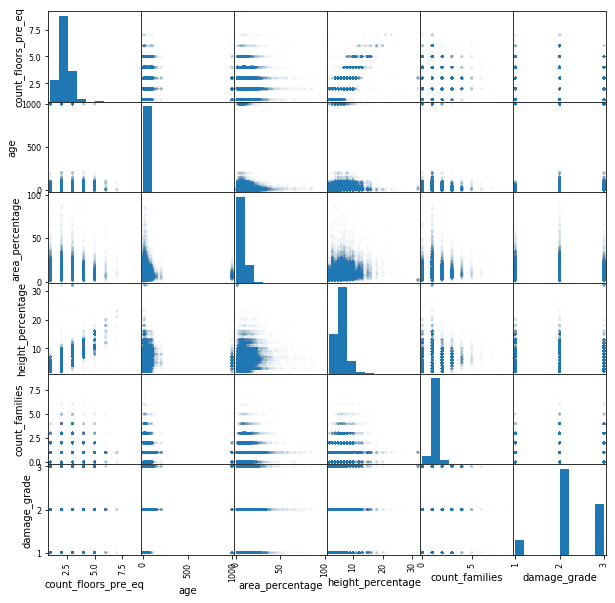

In [7]:
from pandas.plotting import scatter_matrix
_ = scatter_matrix(data[filtered_columns], alpha = .01, figsize = (10, 10))


Как можно заметить ни один из параметров не коррелирует метками, единственная корреляция видна между высотой зданий и количеством комнат.
Отсюда видна несбалансированность классов. Также важно отметить, что метки являются не просто классами, но на них может быть введен и порядок, ввиду чего можно решать как задачу регрессии, так и классификации

In [8]:
data.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
filtered_data.corr()

,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,damage_grade
count_floors_pre_eq,1.000000,0.086668,0.101071,0.772734,0.086586,0.122308
age,0.086668,1.000000,-0.004323,0.061074,0.005309,0.029273
area_percentage,0.101071,-0.004323,1.000000,0.196645,0.088630,-0.125221
height_percentage,0.772734,0.061074,0.196645,1.000000,0.064316,0.048130
count_families,0.086586,0.005309,0.088630,0.064316,1.000000,0.056151
damage_grade,0.122308,0.029273,-0.125221,0.048130,0.056151,1.000000


In [10]:
data.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [11]:
filter_columns = lambda x: not x.startswith('geo_level_') and x != 'building_id'
training_columns = list(filter(filter_columns, columns))
training_data = data[training_columns]

In [12]:
binary_columns = [c for c in training_data.columns if c.startswith('has_') and c != CLASS_COLUMN]
categorical_columns = [c for c in training_data.columns if training_data[c].dtype.name == 'object' and c not in binary_columns and c != CLASS_COLUMN]
numerical_columns   = [c for c in training_data.columns if training_data[c].dtype.name != 'object' and c not in binary_columns and c != CLASS_COLUMN]
nonbinary_columns = categorical_columns

#### Введем функцию, для Mean Target Encoding, for refs go to https://maxhalford.github.io/blog/target-encoding-done-the-right-way/
Мы можем ею пользоваться, поскольку наши метки являются порядковыми

In [13]:
def calc_smooth_mean(df, by, on, m=0):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

In [14]:
#For example
_ = calc_smooth_mean(training_data, by='land_surface_condition', on='damage_grade',m=10)
pd.concat([training_data['land_surface_condition'],_],axis=1).head()

,land_surface_condition,land_surface_condition
0,t,2.23417
1,o,2.28902
2,t,2.23417
3,t,2.23417
4,t,2.23417


In [15]:
m=-1000
mte={}
for column in categorical_columns:
    mte[column] = calc_smooth_mean(training_data, by=column, on='damage_grade',m=m)
    print(column, mte[column].std(),mte[column].unique())

land_surface_condition 0.012058344513546987 [2.23415105 2.2960262  2.25178776]
foundation_type 0.24216732809659364 [2.32999105 1.78068619 1.37140909 1.85691762 1.80966004]
roof_type 0.18336577285111358 [2.26980966 2.32152548 1.52840201]
ground_floor_type 2.5670307664442067 [  2.30944318   2.25123456   1.60860118 -39.06807533   2.5147811 ]
other_floor_type 0.18012977360971186 [2.31622288 2.29873558 2.03786339 1.55021107]
position 0.0373780501125236 [2.31109719 2.22908512 2.14612666 2.18434186]
plan_configuration 0.053493483129696956 [2.2436674  1.7975567  2.33833685 2.27850121 2.25395419 2.43151452
 2.3680111  2.2414473  2.23749724 2.30353425]
legal_ownership_status 0.06797831711140545 [2.24408647 1.8177588  2.17278583 2.52160268]


### Preprocess categorical variables

In [16]:
m=0
if USE_MTE:
    mte=[]
    for column in nonbinary_columns:
        temp = calc_smooth_mean(training_data, by=column, on='damage_grade',m=m)
        mte.append(temp)
    training_data_nonbinary = pd.concat(mte, axis=1, names=nonbinary_columns)
else:
    training_data_nonbinary = pd.get_dummies(training_data[nonbinary_columns])
training_data_nonbinary.head()

,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### Preprocess binary variables

In [17]:
training_data_binary = training_data[binary_columns]
training_data_binary.head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Preprocess numerical variables

In [18]:
temp_training_data_numerical = training_data[numerical_columns]
temp_training_data_numerical.head()

,count_floors_pre_eq,age,area_percentage,height_percentage,count_families
0,2,30,6,5,1
1,2,10,8,7,1
2,2,10,5,5,1
3,2,10,6,5,1
4,3,30,8,9,1


In [19]:
from sklearn.preprocessing import RobustScaler #I use this scaler because it most useful for fix outliers
scaler = RobustScaler

In [20]:
unscaled_data = temp_training_data_numerical.as_matrix()
print(unscaled_data.shape)
_scaled_data = scaler().fit_transform(unscaled_data)
training_data_numerical = pd.DataFrame(_scaled_data, columns=temp_training_data_numerical.columns)
training_data_numerical.head()

(260601, 5)


/home/malchul/work/venvs/venv3p_torch/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


,count_floors_pre_eq,age,area_percentage,height_percentage,count_families
0,0.0,0.75,-0.25,0.0,0.0
1,0.0,-0.25,0.25,1.0,0.0
2,0.0,-0.25,-0.50,0.0,0.0
3,0.0,-0.25,-0.25,0.0,0.0
4,1.0,0.75,0.25,2.0,0.0


# Preprocess labels

In [21]:
label_data = training_data[CLASS_COLUMN]
label_data.head()

0    3
1    2
2    3
3    2
4    3
Name: damage_grade, dtype: int64

#### Concat

In [22]:

if USE_BINARIZED_VALUES:
    preprocess_training_data = pd.concat([training_data_numerical,training_data_nonbinary,training_data_binary, label_data],axis=1)
else:
    preprocess_training_data = pd.concat([training_data_numerical,training_data_nonbinary, label_data],axis=1)
preprocess_training_data.head()

,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,0.0,0.75,-0.25,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0.0,-0.25,0.25,1.0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0.0,-0.25,-0.50,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0.0,-0.25,-0.25,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
4,1.0,0.75,0.25,2.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3


In [23]:
print(list(preprocess_training_data.columns))
print(len(set(preprocess_training_data.columns)),len(list(preprocess_training_data.columns)) )
assert(len(set(preprocess_training_data.columns)) == len(list(preprocess_training_data.columns)))

['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'count_families', 'land_surface_condition_n', 'land_surface_condition_o', 'land_surface_condition_t', 'foundation_type_h', 'foundation_type_i', 'foundation_type_r', 'foundation_type_u', 'foundation_type_w', 'roof_type_n', 'roof_type_q', 'roof_type_x', 'ground_floor_type_f', 'ground_floor_type_m', 'ground_floor_type_v', 'ground_floor_type_x', 'ground_floor_type_z', 'other_floor_type_j', 'other_floor_type_q', 'other_floor_type_s', 'other_floor_type_x', 'position_j', 'position_o', 'position_s', 'position_t', 'plan_configuration_a', 'plan_configuration_c', 'plan_configuration_d', 'plan_configuration_f', 'plan_configuration_m', 'plan_configuration_n', 'plan_configuration_o', 'plan_configuration_q', 'plan_configuration_s', 'plan_configuration_u', 'legal_ownership_status_a', 'legal_ownership_status_r', 'legal_ownership_status_v', 'legal_ownership_status_w', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_sto

## Train-Test split

In [24]:
X = preprocess_training_data.drop(CLASS_COLUMN, axis = 1) # выбрасываем столбец 'class'
y = preprocess_training_data[CLASS_COLUMN]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

182420 78181
(182420, 65) (78181, 65) (182420,) (78181,)


In [26]:
X_train

,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
226217,0.0,0.75,0.00,1.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17342,1.0,0.50,-0.50,0.5,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,1.0,-0.25,-0.50,1.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179726,0.0,-0.25,0.00,0.5,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213308,0.0,0.75,-0.25,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.0,0.50,-0.25,0.0,-1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
103694,0.0,-0.50,-0.50,-0.5,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131932,1.0,0.25,3.75,1.0,0.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
146867,1.0,-0.25,1.00,1.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


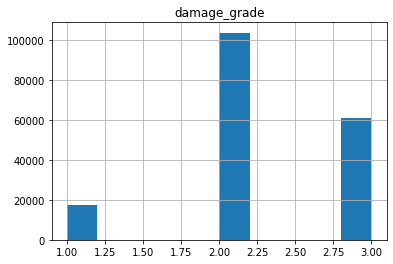

In [27]:
y_train_hist = pd.DataFrame(y_train).hist()

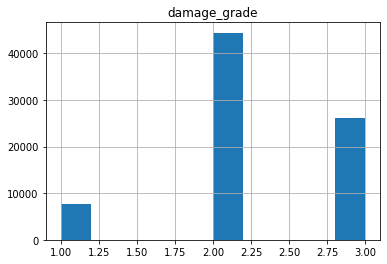

In [28]:
y_test_hist = pd.DataFrame(y_test).hist()

In [29]:
unique = y_train.unique()
y_weight = y_train.copy()
for i in unique:
    y_weight[y_train==i] = sum(y_train!=i)/y_train.count()
    
print(y_weight.unique())

[0.43073676 0.66532178 0.90394145]


In [30]:
#Moda classifier acc
print((y_test==2).sum()/y_test.count())

0.5680919916603778


In [31]:
#Random classifier acc
import random
temp = (np.array([el - random.randint(1,3) for el in y_test]) == 0).sum()/y_test.count()
print(temp)

0.33204998656962686


## KNN Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
#knn.set_params(n_neighbors=10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [33]:
y_test_predict = classifier.predict(X_test)
acc_test  = np.mean(y_test  == y_test_predict)

In [34]:
print('Acc is:',acc_test)

Acc is: 0.5487522543840575


## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200,max_depth=5, n_jobs =-1, random_state=42)
classifier.fit(X_train, y_train, y_weight)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [36]:
y_test_predict = classifier.predict(X_test)
acc_test  = np.mean(y_test  == y_test_predict)

In [37]:
print('Acc is:',acc_test)

Acc is: 0.5429707985316126


from sklearn.svm import SVC
classifier = SVC(decision_function_shape='ovo')
classifier.fit(X_train, y_train)

class_weight()


In [38]:
print('Train Acc is:',classifier.score(X_train, y_train))

Train Acc is: 0.5464039030808026


## GBM

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=30, max_depth=5, random_state=42)
classifier.fit(X_train, y_train, y_weight)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=30,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [40]:
y_test_predict = classifier.predict(X_test)
acc_test  = np.mean(y_test  == y_test_predict)

In [41]:
print('Acc is:',acc_test)

Acc is: 0.5570790857113621


In [42]:
print('Train Acc is:',classifier.score(X_train, y_train))

Train Acc is: 0.5615393049007784


## MLP

In [43]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(30, 100,200,50), verbose=True, random_state=42, max_iter=300, n_iter_no_change=100)


In [ ]:
classifier.fit(X_train, y_train)

In [45]:
y_test_predict = classifier.predict(X_test)
acc_test  = np.mean(y_test  == y_test_predict)

In [46]:
print('Acc is:',acc_test)

Acc is: 0.5822130696716593


**Вывод**: был написан код для обработки данных, обучено несколько моделей, качество на данный момент недостаточно хорошее. Я вижу решение в использовании нейронных сетей, поскольку предполагаю, что обычные методы машинного обучения не могут увидеть сложных закономерностей. Так же планирую использовать geo_level_id в обучении

## Using PCA

In [33]:
from sklearn.decomposition import PCA

In [48]:
miniPCA = PCA(n_components=2)
miniPCA.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

(182420, 2)


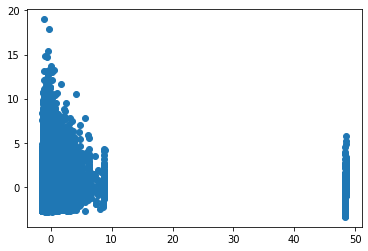

In [49]:
X_train_transformed = miniPCA.transform(X_train)
print(X_train_transformed.shape)
plt.scatter(X_train_transformed[:,0],X_train_transformed[:,1])
plt.show()

(78181, 2)


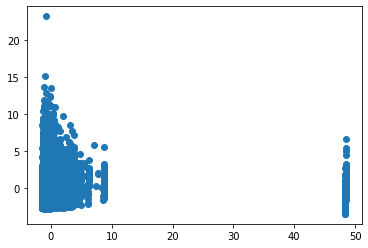

In [50]:
X_test_transformed = miniPCA.transform(X_test)
print(X_test_transformed.shape)
plt.scatter(X_test_transformed[:,0],X_test_transformed[:,1])
plt.show()

In [51]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200,max_depth=3, n_jobs =-1, random_state=42)
classifier.fit(X_train_transformed, y_train, y_weight)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [52]:
y_test_predict = classifier.predict(X_test_transformed)
acc_test  = np.mean(y_test  == y_test_predict)

In [53]:
print('Acc is:',acc_test)

Acc is: 0.5727990176641383


Вывод: Качество модели стало хуже, это связано с тем, что данные стандартизированы и PCA не должен давать преимущества.

In [35]:
newtraining_data = data[training_columns]
newbinary_columns = [c for c in newtraining_data.columns if c.startswith('has_') and c != CLASS_COLUMN]
newcategorical_columns = [c for c in newtraining_data.columns if newtraining_data[c].dtype.name == 'object' and c not in newbinary_columns and c != CLASS_COLUMN]
newnumerical_columns   = [c for c in newtraining_data.columns if newtraining_data[c].dtype.name != 'object' and c not in newbinary_columns and c != CLASS_COLUMN]
newnonbinary_columns = newcategorical_columns

newtraining_data_numerical = newtraining_data[newnumerical_columns]
#newtraining_data_nonbinary = pd.get_dummies(newtraining_data[newnonbinary_columns])
newtraining_data_binary = newtraining_data[newbinary_columns]


m=0
if USE_MTE:
    mte=[]
    for column in nonbinary_columns:
        temp = calc_smooth_mean(newtraining_data, by=column, on='damage_grade',m=m)
        mte.append(temp)
    newtraining_data_nonbinary = pd.concat(mte, axis=1, names=newnonbinary_columns)
else:
    newtraining_data_nonbinary = pd.get_dummies(newtraining_data[newnonbinary_columns])

    
if USE_BINARIZED_VALUES:
    newpreprocess_training_data = pd.concat([newtraining_data_numerical,newtraining_data_nonbinary,newtraining_data_binary, label_data],axis=1)
else:
    newpreprocess_training_data = pd.concat([newtraining_data_numerical,newtraining_data_nonbinary, label_data],axis=1)
    
#newpreprocess_training_data = pd.concat([newtraining_data_numerical,newtraining_data_nonbinary, label_data],axis=1)




newX = newpreprocess_training_data.drop(CLASS_COLUMN, axis = 1) # выбрасываем столбец 'class'
newy = newpreprocess_training_data[CLASS_COLUMN]

newX_train, newX_test, newy_train, newy_test = train_test_split(newX, newy, test_size = 0.3, random_state = 42)

newN_train, _ = newX_train.shape 
newN_test,  _ = newX_test.shape 

In [55]:
newX_train

,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
226217,2,30,7,7,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17342,3,25,5,6,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,3,10,5,7,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179726,2,10,7,6,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213308,2,30,6,5,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2,25,6,5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
103694,2,5,5,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131932,3,20,22,7,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
146867,3,10,11,7,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
miniPCA = PCA(n_components=2)
miniPCA.fit(newX_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

(182420, 2)


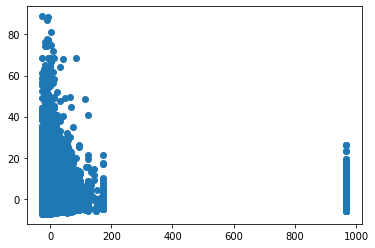

In [57]:
X_train_transformed = miniPCA.transform(newX_train)
print(X_train_transformed.shape)
plt.scatter(X_train_transformed[:,0],X_train_transformed[:,1])
plt.show()

(78181, 2)


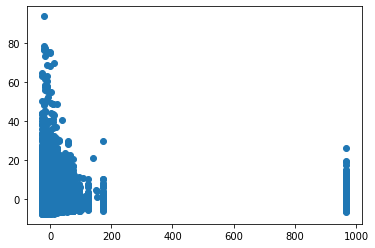

In [58]:
X_test_transformed = miniPCA.transform(newX_test)
print(X_test_transformed.shape)
plt.scatter(X_test_transformed[:,0],X_test_transformed[:,1])
plt.show()

In [59]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200,max_depth=3, n_jobs =-1, random_state=42)
classifier.fit(X_train_transformed, newy_train, y_weight)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [60]:
y_test_predict = classifier.predict(X_test_transformed)
acc_test  = np.mean(newy_test  == y_test_predict)

In [61]:
print('Acc is:',acc_test)

Acc is: 0.5187833361046802


Минивывод: Необходимо не использовать нормализованные данные, ввиду того, что это "размывет распределение" делая дисперсию равной единице. Я оставил все точки, ввиду нормальности распределения точек.

Качество стало лучше, потому что фичи теперь имеют другое распределение и потому что стало меньше бинарных фичей. 

In [ ]:
MAX_COMPONENTS = newX_train.shape[1]
train_acc = []
test_acc = []
for i in range(2,MAX_COMPONENTS):
    print('start i=',i)
    miniPCA = PCA(n_components=i)
    miniPCA.fit(newX_train)
    X_train_transformed = miniPCA.transform(newX_train)
    classifier = RandomForestClassifier(n_estimators=200,max_depth=10, n_jobs =-1, random_state=42)
    classifier.fit(X_train_transformed, newy_train, y_weight)
    
    
    y_train_predict = classifier.predict(X_train_transformed)
    acc_train  = np.mean(newy_train == y_train_predict)
    train_acc.append(acc_train)
    
    X_test_transformed = miniPCA.transform(newX_test)
    y_test_predict = classifier.predict(X_test_transformed)
    acc_test  = np.mean(newy_test == y_test_predict)
    test_acc.append(acc_test)
    print(acc_train, acc_test)
    

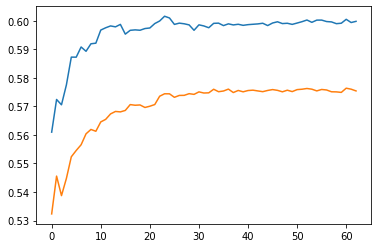

In [63]:
plt.plot(train_acc)
plt.plot(test_acc)
plt.show()


Вывод: я переобучил классификатор случайным лесом, лучшее количество фич находится при i=62. Применим это значение при обучении нейронной сети

In [36]:
miniPCA = PCA(n_components=62) # Берем лучшее i
miniPCA.fit(newX_train)
X_train_transformed = miniPCA.transform(newX_train)
X_test_transformed = miniPCA.transform(newX_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(30, 100,200,50), verbose=True, random_state=42, max_iter=300, n_iter_no_change=100)
classifier.fit(X_train_transformed, y_train)

In [66]:
y_test_predict = classifier.predict(X_test_transformed)
acc_test  = np.mean(newy_test == y_test_predict)
print("Acc test:", acc_test)

Acc test: 0.5743850807741011


## Влияние гиперпараметров на полносвязный персептрон

In [44]:
alphas = np.geomspace(1e-6,1,10)
alphas

array([1.00000000e-06, 4.64158883e-06, 2.15443469e-05, 1.00000000e-04,
       4.64158883e-04, 2.15443469e-03, 1.00000000e-02, 4.64158883e-02,
       2.15443469e-01, 1.00000000e+00])

In [ ]:
from sklearn.neural_network import MLPClassifier

alphas = np.geomspace(1e-6,1,10)
train_accs = []
test_accs = []
for alpha in alphas:
    classifier = MLPClassifier(alpha=alpha,hidden_layer_sizes=(100,100), verbose=True, random_state=42, max_iter=100, n_iter_no_change=100)
    classifier.fit(X_train_transformed, y_train)
    
    y_train_predict = classifier.predict(X_train_transformed)
    acc_train  = np.mean(newy_train == y_train_predict)
    train_accs.append(acc_train)
    
    y_test_predict = classifier.predict(X_test_transformed)
    acc_test  = np.mean(newy_test == y_test_predict)
    test_accs.append(acc_test)
    print("Acc test:", acc_test)


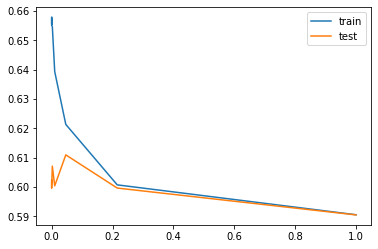

In [50]:
plt.plot(alphas, train_accs)
plt.plot(alphas, test_accs)
plt.legend(['train','test'])
plt.show()

In [ ]:
units = np.linspace(20, 400, 10).astype(np.int)
train_accs = []
test_accs = []
for unit in units:
    classifier = MLPClassifier(hidden_layer_sizes=(unit,unit), verbose=True, random_state=42, max_iter=150, n_iter_no_change=100)
    classifier.fit(X_train_transformed, y_train)
    
    y_train_predict = classifier.predict(X_train_transformed)
    acc_train  = np.mean(newy_train == y_train_predict)
    train_accs.append(acc_train)
    
    y_test_predict = classifier.predict(X_test_transformed)
    acc_test  = np.mean(newy_test == y_test_predict)
    test_accs.append(acc_test)
    print("Acc test:", acc_test)


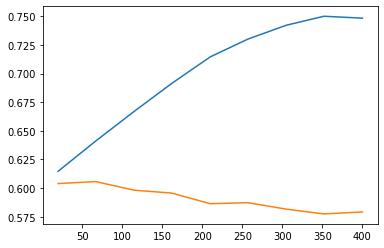

In [71]:
plt.plot(units, train_accs)
plt.plot(units, test_accs)
plt.show()

Как видно, alpha не влияет на переобучаемость, это можно определить что при очень маленьком значении значение пусть и больше, но не сильно, а при большем alpha модель недообучается, о чем свидетельствует убывание графика.

При большем количестве нейронов в скрытых слоях наблюдается переобучение, поскольку на тренировочном датасете качество увеличивается, а на валидационоом падает.